# Package imports and preparations

In [35]:
cd /home/schlecker/repos/planeteScripts

/home/schlecker/repos/planeteScripts


In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import output
import plots
import stats
import utils

%load_ext autoreload
%autoreload 2

# default output folder
outputs = '/home/schlecker/phd/planete/outputs/'

# show more columns in pandas data frames
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read in the data
We look at the system at t=5*10^9 yr.
- read this snapshot
- compute orbital period from Mstar and sma
- for each system, draw Msin(i)
- count the initial number of systems

In [37]:
rr5e9 = outputs + 'J34/ref_red5e9.dat'
j34 = output.Population(rr5e9)
pop = j34.data

In [38]:
# this is slow. 
pop['msini'] = np.nan
for i in pop.isystem:
    pop.loc[pop.isystem == i, 'msini'] = utils.get_sini()*pop[pop.isystem == i]['m']

distribution of inclinations for isotropically distributed orbits follow sin(i).

(array([ 0.09491897,  0.24820028,  0.38544797,  0.4970419 ,  0.64711648,
         0.74524217,  0.86389088,  0.93828683,  0.97612615,  1.01717219]),
 array([ 0.01152613,  0.1674486 ,  0.32337107,  0.47929354,  0.63521601,
         0.79113848,  0.94706095,  1.10298342,  1.25890589,  1.41482836,
         1.57075083]),
 <a list of 10 Patch objects>)

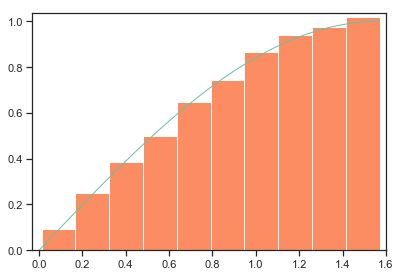

In [191]:
i = np.linspace(0.,np.pi/2, len(m))
plt.plot(i, np.sin(i))

fi = np.arcsin(utils.get_msini(m))
plt.hist(fi, normed=True)

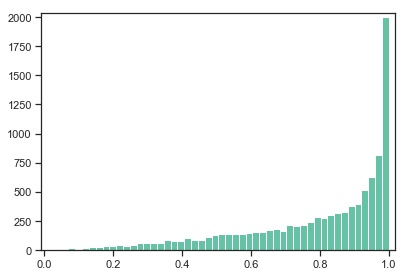

In [192]:
h = plt.hist([utils.get_sini() for i in range(len(m))], bins=50)

In [39]:
pop = utils.get_orbitalPeriod(pop, MstarRel=1.)
Nsystems_initial = pop.isystem.nunique()
print("number of systems in this population: {}".format(Nsystems_initial))

number of systems in this population: 972


In [40]:
pop['msini'].describe()

count    48600.000000
mean        21.252596
std        273.069810
min          0.000060
25%          0.054639
50%          0.223008
75%          0.831225
max      14498.561681
Name: msini, dtype: float64

# General occurrences 
In this section, we investigate occurrences of the synthetic population in planet size/orbital period

In [41]:
pop.r_rEarth = utils.r_Jup2r_Earth(pop['r'])
pop.r_rEarth.describe()

count    48600.000000
mean        14.878256
std        184.485501
min          0.038336
25%          0.498626
50%          0.931980
75%          2.485066
max       9546.663622
Name: r, dtype: float64

In [178]:
fig, ax = plt.subplots()
J34occ = plots.plot_occurrence(CJsystems, ax=ax, xRange=(1.,300.), yRange=(0.5, 200.), kind='annotate', binWidth_dex=(0.25, 0.1), logColormap=True)

# workaround for axis labels
J34occ[3].set_xlabel('Orbital Period [d]')
# J34occ[3].annotate('Planet Size [$\mathrm{R_{Earth}}$]', xy=(0.05,0.5), xytext=(0.02, 0.5), xycoords='figure fraction', textcoords='figure fraction', rotation=90, verticalalignment='center', size='larger')

using only planets with status "0"
Number of Systems: 188


Text(0.5,0,'Orbital Period [d]')

In [45]:
# save as eps to avoid white lines between histogram cells
fig.savefig(outputs + 'J34/j34occurrence.eps')

# Occurrences of different planet types

We categorize planets into Super Earths (SE) or Cold Jupiters (CJ) according to the rules in Zhu & Wu 2018 (including the requirement for RV semi-amplitude K > 3 m/s)

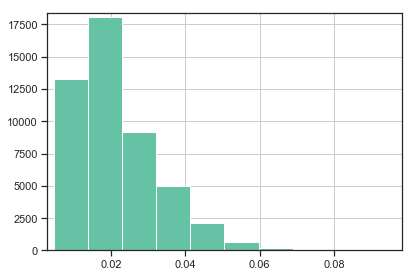

In [222]:
np.log10(pop.dust2gas.hist()

In [101]:
pop = stats.categorizePlanets(pop, ZhuWu18=True)
stats.print_categories(pop, Mgiant=95.)
Nsystems = pop.isystem.nunique()

giant mass Mgiant = 95.0
number of planets: 26919
number of ejected planets: 1349
Number of planets more massive than M_Earth: 6095
Number of planets more massive than M_Earth and ejected: 842
Number of planets more massive than M_giant: 629
Number of planets more massive than M_giant and ejected: 29


just quickly checking the radius distribution (in Jupiter radii!) of the giants

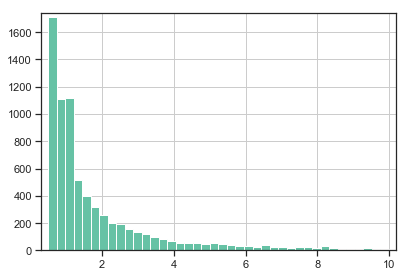

In [61]:
pop[(pop.r < 10) & (pop.r > 0.5)].r.hist(bins=40)

Extract CJ and SE from the population; count them

In [62]:
j34CJ = pop[pop['planetType'] == 'ColdJupiter']
j34SE = pop[pop['planetType'] == 'SuperEarth']
print('number of SE: {}'.format(len(j34SE)))
print('number of CJ: {}'.format(len(j34CJ)))
print('number of systems with SE: {}'.format(pop[pop['planetType'] == 'SuperEarth'].isystem.nunique()))
print('number of systems with CJ: {}'.format(pop[pop['planetType'] == 'ColdJupiter'].isystem.nunique()))

number of SE: 1104
number of CJ: 238
number of systems with SE: 396
number of systems with CJ: 188


check if the CJ really are CJ

In [63]:
j34CJ.r.describe()

count    238.000000
mean       1.017564
std        0.054939
min        0.808987
25%        0.985246
50%        1.033905
75%        1.060480
max        1.083660
Name: r, dtype: float64

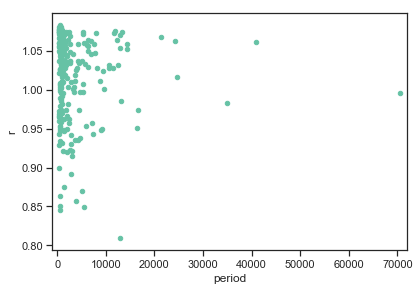

In [64]:
j34CJ.plot.scatter('period', 'r')

the CJs are not very large, in fact they never go beyond ~1.1 Rjup.

-------------------------

## Recompute some probabilities of Zhu & Wu 2018

#### Probability to have no SE, no CJ
We are using P(SE) = .3 -- .5 and the summation rule for probabilities

P(noSE+noCJ) = 1 - (P(SE) + P(CJ) - P(SE+CJ)) 


In [202]:
1 - (np.array([.3, .5]) + .1 - .09)

array([ 0.69,  0.49])

P(SE+noCJ) = P(SE) - P(SE+CJ)

In [203]:
np.array([.3, .5]) - 0.09

array([ 0.21,  0.41])

--------------------------------

# Occurrence Probabilities
### Probabilities of having a SE/CJ

In [66]:
P_SE = j34SE.isystem.nunique()/Nsystems
P_CJ = j34CJ.isystem.nunique()/Nsystems
print(P_SE)
print(P_CJ)

0.4074074074074074
0.1934156378600823


### Probability of having neither a SE nor a CJ

In [68]:
# create a mask that is True where there is either type of planet
SEorCJmask = {i: ((group['planetType'] == 'SuperEarth').any() | (group['planetType'] == 'ColdJupiter').any()) 
              for i, group in pop.groupby('isystem')}
NnoSEnoCJ = sum([not i for i in SEorCJmask.values()]); print(NnoSEnoCJ)
P_noSEnoCJ = NnoSEnoCJ/Nsystems; print(P_noSEnoCJ)

502
0.5164609053497943


that is quite a high rate of noSEnoCJ. Let's check with an independent second count

In [69]:
NnoSEnoCJ_2 = 0
for i, group in pop.groupby('isystem'):
    if (not 'ColdJupiter' in group.planetType.values) and (not 'SuperEarth' in group.planetType.values):
        NnoSEnoCJ_2 += 1
NnoSEnoCJ_2

502

OK, it is consistent.

### Probability of having both a SE *and* a CJ

In [70]:
SEandCJmask = {i: ((group['planetType'] == 'SuperEarth').any() & (group['planetType'] == 'ColdJupiter').any()) 
               for i, group in pop.groupby('isystem')}
N_SEandCJ = sum([i for i in SEandCJmask.values()]); print(N_SEandCJ)
P_SEandCJ = N_SEandCJ/Nsystems; print(P_SEandCJ)

114
0.117283950617


### Probability of having at least one SE but _no_ CJ

In [71]:
SEnoCJmask = {i: ((group['planetType'] == 'SuperEarth').any() & ~(group['planetType'] == 'ColdJupiter').any()) 
              for i, group in pop.groupby('isystem')}
N_SEnoCJ = sum([i for i in SEnoCJmask.values()]); print(N_SEnoCJ)
P_SEnoCJ = N_SEnoCJ/Nsystems; print(P_SEnoCJ)

282
0.29012345679


### Probability of having _no_ SE but at least one CJ

In [214]:
noSECJmask = {i: (~(group['planetType'] == 'SuperEarth').any() & (group['planetType'] == 'ColdJupiter').any()) 
              for i, group in pop.groupby('isystem')}
N_noSEandCJ = sum([i for i in noSECJmask.values()]); print(N_noSECJ)
P_noSEandCJ = N_noSEandCJ/Nsystems; print(P_noSEandCJ)

74
0.0761316872428


### consistency checks
Probability of having *any* case (better be one!)

In [73]:
print(P_noSECJ + P_SEnoCJ + P_noSEnoCJ + P_SEandCJ)

1.0


P(noSE+noCJ) = 1 - (P(SE) + P(CJ) - P(SE+CJ)) (summation rule)

In [200]:
P_noSEnoCJ

0.5164609053497943

In [201]:
np.isclose(1 - (P_SE + P_CJ - P_SEandCJ), P_noSEnoCJ)

True

## Conditional probabilities

In [74]:
len(pop[pop['planetType'] == 'ColdJupiter'].isystem.unique())

188

In [75]:
# def get_probs(pop, uniqueSystem=True):
#     """ Calculate probabilities for certain planet types.
    
#     Parameters
#     ----------
#     pop : pandas DataFrame
#         population or subpopulation of planets. 
#         Can be multi-planet systems (has to include a column 'isystem')
#     uniqueSystem : Bool
#         get probabilities for unique systems, not just considering the whole 
#         bunch of planets
#     """
#     Nsystems = pop.isystem.nunique()    
#     Nplanets = len(pop)
    
#     j34CJ = pop[pop['planetType'] == 'ColdJupiter']
#     j34SE = pop[pop['planetType'] == 'SuperEarth']
    
#     # get systems containing >=1 SE/CJ
#     CJsystemNo = pop[pop['planetType'] == 'ColdJupiter'].isystem.unique()
#     SEsystemNo = pop[pop['planetType'] == 'SuperEarth'].isystem.unique()   
#     CJsystems = pop[pop.isystem.isin(CJsystemNo)]
#     SEsystems = pop[pop.isystem.isin(SEsystemNo)]
    
#     # P(SE|CJ)
    
    

In [76]:
CJsystemNo = pop[pop['planetType'] == 'ColdJupiter'].isystem.unique()
SEsystemNo = pop[pop['planetType'] == 'SuperEarth'].isystem.unique()   
CJsystems = pop[pop.isystem.isin(CJsystemNo)]
SEsystems = pop[pop.isystem.isin(SEsystemNo)]
N_CJsystems = CJsystems.isystem.nunique()
N_SEsystems = SEsystems.isystem.nunique()

### What is the probability to have at least one SE(CJ) in a system with at leat one CJ(SE)?

In [77]:
SEsInCJsystemsNo = CJsystems[CJsystems['planetType'] == 'SuperEarth'].isystem.unique()
CJsInSEsystemsNo = SEsystems[SEsystems['planetType'] == 'ColdJupiter'].isystem.unique()
SEsInCJsystems = CJsystems[CJsystems.isystem.isin(SEsInCJsystemsNo)]
CJsInSEsystems = SEsystems[SEsystems.isystem.isin(CJsInSEsystemsNo)]
N_SEsInCJsystems = SEsInCJsystems.isystem.nunique()
N_CJsInSEsystems = CJsInSEsystems.isystem.nunique()

these two sets should be the same, let's check this

In [78]:
SEsInCJsystems.equals(CJsInSEsystems)

True

Compute P(CJ|SE) and P(SE|CJ)

In [193]:
P_CJSE = N_CJsInSEsystems/N_SEsystems; print(P_CJSE)
P_SECJ = N_SEsInCJsystems/N_CJsystems; print(P_SECJ)

0.2878787878787879
0.6063829787234043


P(CJ|SE) is consistent with Zu&Wu, P(SE|CJ) is not (they find 0.9+-0.2, although in an indirect approach imposing Bayes' theorem)
___________________________
Compute P(noSE|CJ), i.e. the probability to have no SE in systems with at least one CJ (as in the Solar System)

and P(noCJ|SE)

In [194]:
noSEsInCJsystems = CJsystems[~CJsystems.isystem.isin(SEsInCJsystemsNo)]
noCJsInSEsystems = SEsystems[~SEsystems.isystem.isin(CJsInSEsystemsNo)]
N_noSEsInCJsystems = noSEsInCJsystems.isystem.nunique()
N_noCJsInSEsystems = noCJsInSEsystems.isystem.nunique()

In [195]:
P_noSECJ = N_noSEsInCJsystems/N_CJsystems; print(P_noSECJ)
P_noCJSE = N_noCJsInSEsystems/N_SEsystems; print(P_noCJSE)

0.39361702127659576
0.7121212121212122


#### Consistency Checks

Confirm P(noSE|CJ) with a different method

In [196]:
N_CJsystems2 = 0
N_noSEinCJsystem = 0
for i, group in pop.groupby('isystem'):
    if (group.planetType == 'ColdJupiter').any():
        N_CJsystems2 += 1
        if not (group.planetType == 'SuperEarth').any():
            N_noSEinCJsystem += 1
print(N_noSEinCJsystem/N_CJsystems2)

0.39361702127659576


the sums of exclusive conditional probabilities should yield one

In [206]:
P_SECJ

0.6063829787234043

In [207]:
P_noSECJ

0.39361702127659576

#### Write results to a table

In [218]:
# probs_nom = [P_SE, P_CJ, P_SEandCJ, P_noSEnoCJ, P_SEnoCJ, P_noSEandCJ, P_SECJ, P_CJSE, P_noSECJ, P_noCJSE]


In [219]:
index = ['P_SE', 'P_CJ', 'P_SEandCJ', 'P_noSEnoCJ', 'P_SEnoCJ', 'P_noSEandCJ', 'P_SECJ', 'P_CJSE', 'P_noSECJ', 'P_noCJSE']
results = pd.DataFrame({'nominal' : probs_nom}, index=index)

In [220]:
results

,nominal
P_SE,0.407407
P_CJ,0.193416
P_SEandCJ,0.117284
P_noSEnoCJ,0.516461
P_SEnoCJ,0.290123
P_noSEandCJ,0.076132
P_SECJ,0.606383
P_CJSE,0.287879
P_noSECJ,0.393617
P_noCJSE,0.712121


--------------------------------------

### Expected Detections of planet types

Barbato et al. (2018) conducted an RV search for SE in 20 systems and find none. 
ZW18 claim that their zero detection is "consistent at 95% confidence level". 

Let's calculate the probability of detecting zero SEs in a sample of 20 systems assuming 50% detection probability and 30% SE occurrence. 

In [223]:
def measure(p_SE, p_detect):
    """Detect or not detect a planet in one system."""
    ran = np.random.random()
    if ran < (p_detect*p_SE):
        return True
    else:
        return False
    
def survey(p_SE, p_detect, Nmeasurements):
    """Conduct a survey in Nmeasurements systems."""
    return [measure(p_SE, p_detect) for n in range(Nmeasurements)]

In [239]:
def plot_histDetections(ensemble, Nmeasurements):
    """plot a histogram showing the probabilities to detect
    [0, 1, ...N] planets in a survey.
    """
    fig, ax = plt.subplots()
    H, bins, patches = plt.hist(ensemble, bins=[i -0.5 for i in range(max(ensemble) + 1)],
                                density=True)
    ax.set_xlabel('Number of SE detections per {} systems'.format(Nmeasurements))
    ax.set_ylabel('Probability')
    return H

In [244]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [247]:
p_SE = .09
p_detect = .5
Nmeasurements = 20
Nexperiments = 10000

# Conduct Nexperiments surveys. Save the number of detected planets for each survey.
ensemble = [sum(survey(p_SE, p_detect, Nmeasurements)) for N in range(Nexperiments)]

# plot the probabilities and show the probability to detect zero planets
H = plot_histDetections(ensemble, Nmeasurements)
H[0]

0.397859143657463

If P(SE) = 30%, there is only a 3.9% chance of finding zero planets in Barbato's survey.

If P(SE) = ~9%, as Barbato+18 suggest, the probability for zero detection rises to 40%. 

--------------------------------